In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

Para el circuito con $Z_L = 80 - 15j$ se obtuvieron:
Solución 1:
\begin{align}
&C_p = 1.2\;pF&
&L_s = 6.447\;pF \\
\end{align}
Solución 2:
\begin{align}
&L_p = 13.2\;nH&
&C_s = 3.93\;pF \\
\end{align}

In [27]:
ZL = 80-15J
Zo = 50
Cp = 1.1965426451480606e-12
Ls = 6.446511981552704e-09
Lp = 1.3211825040176498e-08
Cs = 3.929302541136888e-12

\begin{align*}
    &\text{Opción 1:}&
    &\text{Opción 2:} \\
    & Z_{in} = 6,45\text{nH}\cdot \omega j + \left ( Z_L\;// \;\frac{-j}{1.2\text{pF}\cdot \omega } \right )&
    &Z_{in} =  \frac{-j}{3.93\text{pF}\cdot \omega } + \left ( Z_L \;//\;13,2\text{nH}\cdot\omega j\right )\\
\end{align*}

In [28]:
Zin_1 = lambda f: Ls*2*math.pi*f*1J + ((1/ZL) + (-1J/(Cp*2*math.pi*f))**-1)**-1
Zin_2 = lambda f: (-1J/(Cs*2*math.pi*f)) + ((1/ZL) + (Lp*2*math.pi*f*1J)**-1)**-1
print(Zin_1(1e9),Zin_2(1e9))
r = lambda Zin: (Zin-Zo)/(Zin+Zo)
ROE = lambda r: (1+abs(r)) / (1-abs(r))
RL = lambda r: -20*np.log(abs(r))

(49.99999999999999-2.1316282072803006e-14j) (49.99999999999999+0j)


In [29]:
x = np.linspace(900*1e6, 1.1*1e9, 1000000)


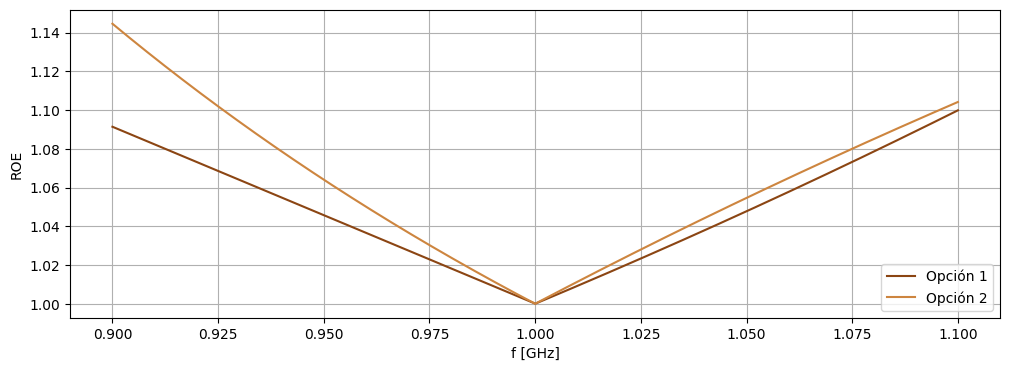

In [30]:
fig = plt.figure(figsize=(12,4))
plt.plot(x*1e-9, ROE(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x*1e-9, ROE(r(Zin_2(x))), label= "Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("ROE")
plt.legend(loc="lower right")
plt.savefig("Ej1-Carga4_ROE")
plt.show()

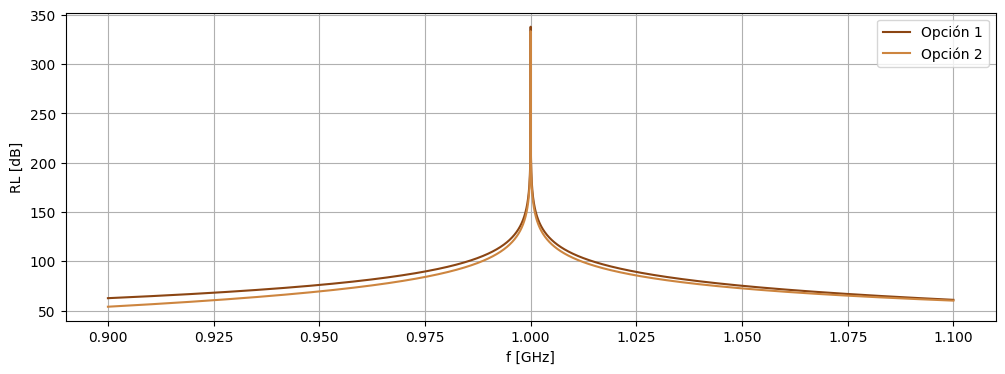

In [31]:
fig = plt.figure(figsize=(12,4))
plt.plot(x*1e-9, RL(r(Zin_1(x))), label="Opción 1", color="saddlebrown")
plt.plot(x*1e-9, RL(r(Zin_2(x))), label= "Opción 2", color="peru")
plt.grid()
plt.xlabel("f [GHz]")
plt.ylabel("RL [dB]")
plt.legend(loc="upper right")
plt.savefig("Ej1-Carga4_RL")
plt.show()